In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('data/ru_train.csv')

In [20]:
len(train)

10574516

In [16]:
train.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,По,По
1,0,1,PLAIN,состоянию,состоянию
2,0,2,PLAIN,на,на
3,0,3,DATE,1862 год,тысяча восемьсот шестьдесят второй год
4,0,4,PUNCT,.,.


In [19]:
train.loc[0]['class']

'PLAIN'

In [7]:
classes = train['class'].unique()

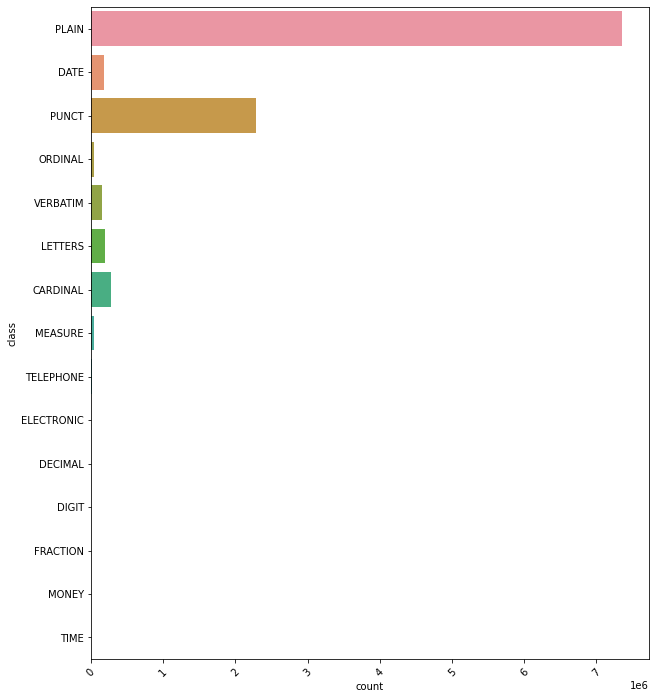

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,12))
count_classes_fig = sns.countplot(y="class", data=train, ax=ax)
for item in count_classes_fig.get_xticklabels():
    item.set_rotation(45)

In [ ]:
for c in classes:
    print(train[train['class'] == c].tail(10).to_markdown())

# Найдите примеры каждого класса и опишите, по какой логике проведена нормализация токенов разных классов. 

## TIME
Время вида 10:20:30 остается без изменений.
Время вида 3:31 переводится в письменный вид. Если указаны a.m/p.m, то добавляется указание ночь/день. При указании часового пояса часовой пояс обрабатывается, как LETTERS.

## LETTERS
Буквы приводятся к строчному виду, между буквами вставляются пробелы.

## MONEY
Знак $ приводится к виду "долларов сэ ш а". Цифры приводятся к письменному виду.

## FRACTION
Приводятся к письменному виду

## DIGIT
Каждая отдельная цифра приводится к письменному виду.

## DECIMAL
Цифры приводятся к письменному виду. Единицы изменерения к полному виду.

## ELECTRONIC
Все буквы транслитируются в русские, для латиницы появляется указание _trans.

## TELEPHONE
Цифры в письменный вид. - в sil.

## MEASURE 
Цифры в письменный вид. Единицы изменерения к полному виду.

## CARDINAL
К письменному виду.

## VERBATIM
-

## ORDINAL
К письменному виду.

## PUNCT
-

## DATE
К письменному виду с сохранением падежей.



In [ ]:
df_train_mismatch = train[train.before != train.after]
print('%f%% of df_train' % (100 * len(df_train_mismatch) / len(train)))
df_train_mismatch

In [17]:
# В каких случаях токены класса PLAIN подвергаются нормализации? 
Русские PLAIN не изменяются, латинские транслитируются к русским буквам с указанием _trans

|          |   sentence_id |   token_id | class   | before      | after                                                   |
|---------:|--------------:|-----------:|:--------|:------------|:--------------------------------------------------------|
| 10574502 |        761435 |          1 | PLAIN   | сегодняшний | сегодняшний                                             |
| 10574503 |        761435 |          2 | PLAIN   | день        | день                                                    |
| 10574505 |        761435 |          4 | PLAIN   | октябрь     | октябрь                                                 |
| 10574508 |        761435 |          7 | PLAIN   | забеги      | забеги                                                  |
| 10574509 |        761435 |          8 | PLAIN   | parkrun     | п_trans а_trans р_trans к_trans р_trans а_trans н_trans |
| 10574510 |        761435 |          9 | PLAIN   | проводятся  | проводятся                                              |
| 105745

|          |   sentence_id |   token_id | class     | before            | after                                                                                                                |
|---------:|--------------:|-----------:|:----------|:------------------|:---------------------------------------------------------------------------------------------------------------------|
| 10569426 |        761070 |          8 | TELEPHONE | 2073-543          | двадцать семьдесят три sil пятьсот сорок три                                                                         |
| 10569601 |        761081 |         18 | TELEPHONE | 0-89141-570       | ноль sil восемьсот девяносто один сорок один sil пятьсот семьдесят                                                   |
| 10569710 |        761089 |         15 | TELEPHONE | 978-5-8459-1693-8 | девятьсот семьдесят восемь sil пять sil восемьдесят четыре пятьдесят девять sil шестнадцать девяносто три sil восемь |
| 10572050 |        761250 |       

|          |   sentence_id |   token_id | class   | before        | after                                                        |
|---------:|--------------:|-----------:|:--------|:--------------|:-------------------------------------------------------------|
| 10549369 |        759633 |          2 | TIME    | 10:20         | десять часов двадцать минут                                  |
| 10551150 |        759760 |          5 | TIME    | 9:13 p.m. CDT | девять часов тринадцать минут вечера по часовому поясу c d t |
| 10553711 |        759942 |          1 | TIME    | 3:31          | три часа тридцать одна минута                                |
| 10556568 |        760140 |          1 | TIME    | 17:30         | семнадцать часов тридцать минут                              |
| 10556570 |        760140 |          3 | TIME    | 19:30         | девятнадцать часов тридцать минут                            |
| 10560254 |        760410 |          2 | TIME    | 12:00 a.m.    | двенадцать часо

# Найдите примеры каждого класса и опишите, по какой логике проведена нормализация токенов разных классов. 

## TIME
Время вида 10:20:30 остается без изменений.
Время вида 3:31 переводится в письменный вид. Если указаны a.m/p.m, то добавляется указание ночь/день. При указании часового пояса часовой пояс обрабатывается, как LETTERS.

## LETTERS
Буквы приводятся к строчному виду, между буквами вставляются пробелы.

## MONEY
Знак $ приводится к виду "долларов сэ ш а". Цифры приводятся к письменному виду.

## FRACTION
Приводятся к письменному виду

## DIGIT
Каждая отдельная цифра приводится к письменному виду.

## DECIMAL
Цифры приводятся к письменному виду. Единицы изменерения к полному виду.

## ELECTRONIC
Все буквы транслитируются в русские, для латиницы появляется указание _trans.

## TELEPHONE
Цифры в письменный вид. - в sil.

## MEASURE 
Цифры в письменный вид. Единицы изменерения к полному виду.

## CARDINAL
К письменному виду.

## VERBATIM
-

## ORDINAL
К письменному виду.

## PUNCT
-

## DATE
К письменному виду с сохранением падежей.



In [4]:
df_train_mismatch = train[train.before != train.after]
print('%f%% of df_train' % (100 * len(df_train_mismatch) / len(train)))
df_train_mismatch

12.508355% of df_train


,sentence_id,token_id,class,before,after
3,0,3,DATE,1862 год,тысяча восемьсот шестьдесят второй год
17,2,2,DATE,1811 года,тысяча восемьсот одиннадцатого года
43,3,7,PLAIN,Tiberius,т_trans и_trans б_trans е_trans р_trans и_tran...
44,3,8,PLAIN,Julius,д_trans ж_trans у_trans л_trans и_trans у_tran...
45,3,9,PLAIN,Pollienus,п_trans о_trans л_trans л_trans и_trans е_tran...
...,...,...,...,...,...
10574485,761434,0,PLAIN,Parkia,п_trans а_trans р_trans к_trans и_trans я_trans
10574486,761434,1,PLAIN,parrii,п_trans а_trans р_trans р_trans и_trans и_trans
10574492,761434,7,MEASURE,2 метров,двух метров
10574506,761435,5,CARDINAL,2015,две тысячи пятнадцать


# В каких случаях токены класса PLAIN подвергаются нормализации? 
Русские PLAIN не изменяются, латинские транслитируются к русским буквам с указанием _trans

In [21]:
train[train['class'] == 'PLAIN'].tail(20)

,sentence_id,token_id,class,before,after
10574490,761434,5,PLAIN,растение,растение
10574491,761434,6,PLAIN,до,до
10574493,761434,8,PLAIN,высотой,высотой
10574494,761434,9,PLAIN,с,с
10574495,761434,10,PLAIN,твердым,твердым
10574496,761434,11,PLAIN,стеблем,стеблем
10574497,761434,12,PLAIN,и,и
10574498,761434,13,PLAIN,гладкими,гладкими
10574499,761434,14,PLAIN,листьями,листьями
10574501,761435,0,PLAIN,На,На
